In [79]:
import numpy as np
import pandas as pd
import scipy
import random
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d
from celluloid import Camera

In [91]:
# (n-1)th order polynomial 
def polynomial(params, x):
    ans = np.zeros(x.shape[0])
    for p in range(x.shape[0]):
        for i in range(params.shape[0]):
            ans[p] += params[i]*(x[p]**i)
    return ans

def cost(params, x, y):
    ans = np.sum((y-polynomial(params, x))**2)
    return ans

def cost_regulation(params, x, y, lmd):
    ans = np.sum((y-polynomial(params, x))**2) + lmd*np.sum(params**2)
    return ans

def create_sampledata(num):
    # num = 10 : number of data points
    idx = np.arange(num) 
    x = np.zeros(num)
    y = np.zeros(num)

    for i in idx:
        noise = np.random.normal(0,0.1)
        x[i] = random.uniform(0, 1)
        y[i] = np.sin(2*np.pi*x[i]) + noise
    #plt.scatter(x,y, alpha =0.5)
    return x, y
    
def optimize_params(x, y, n, lmd):
    init = np.ones(n)
    bounds = []
    for i in range(n):
        bounds.append((-10, 10))
    ans = scipy.optimize.minimize(cost_regulation,
            init,
            args = (x, y, lmd),
            tol = 1e-20)
    ans_params = ans.x 
    return ans_params

def draw_graph(x,y,ans_params,fig,ax,n):
    #fig, ax = plt.subplots(figsize=(7,5))
    #ax.legend().remove()
    data = ax.scatter(x, y, alpha =0.5, c = 'dodgerblue')
    x_tick = np.linspace(0,1,50)
    graph = ax.plot(x_tick, polynomial(ans_params,x_tick), c = 'orange', alpha = 0.8)
    ax.set_ylim(-1.25,1.25)
    ax.set_xlim(0,1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')  
    ax.legend(graph, ["Order number: {}".format(n)])
    #plt.scatter(x_tick, polynomial(ans_params,x_tick), c = 'orange', alpha = 0.8)
    return fig, ax 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 700x500 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

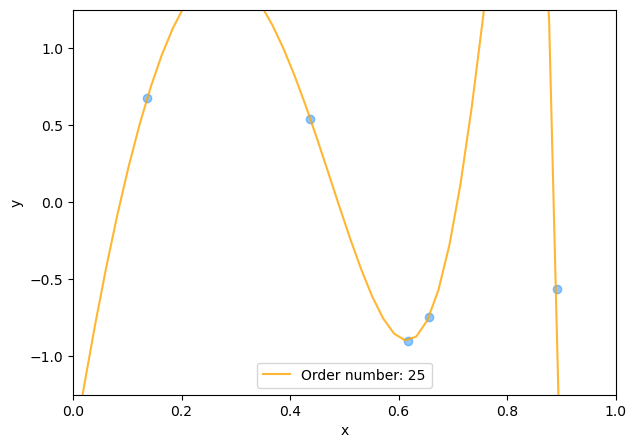

In [92]:
num_data = 5

x, y = create_sampledata(num_data)

n = 25 # number of polynomial coefficients
lmd = 0
fig, ax = plt.subplots(figsize=(7,5))
camera = Camera(fig)

ans_params = optimize_params(x, y, n, lmd)
draw_graph(x, y, ans_params, fig, ax, n)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

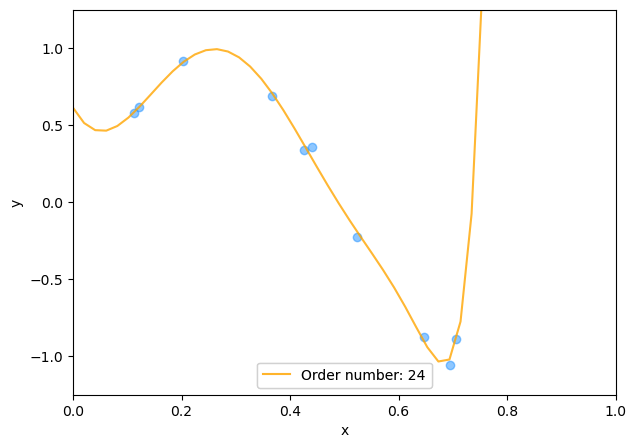

In [93]:
num_data = 10
x, y = create_sampledata(num_data)
n = 25 # max number of polynomial coefficients
lmd = 0
fig, ax = plt.subplots(figsize=(7,5))
camera = Camera(fig)

for n in range(1,n):
    #print(n)
    ans_params = optimize_params(x, y, n, lmd)
    draw_graph(x, y, ans_params, fig, ax, n)
    camera.snap()

animation = camera.animate(interval=500, blit=True)
animation.save('animation.gif')